In [227]:
from plotnine import *
import pandas

df=pandas.read_feather('reports/bench_report_mancorr_11Jul.feather')

df = pandas.DataFrame(data={
    'workflow':['module4', 'tpch', 'badkaggle']*3,
    'Optimization method':['none']*3 + ['modin']*3 + ['p2d2']*3,
    'wall_time': [100,100,100,80,80,80,60,60,100],
    'db_time': [50,50,50,50,50,50,40,60,50]})
workflow_cat = pworkflow_cat = pandas.CategoricalDtype(categories=['module4', 'tpch', 'badkaggle'], ordered=True)
df['workflow'] = df['workflow'].astype(workflow_cat)andas.CategoricalDtype(categories=['module4', 'tpch', 'badkaggle'], ordered=True)
df['workflow'] = df['workflow'].astype(workflow_cat)
df['python_time'] = df['wall_time'] - df['db_time']
df = df.melt(id_vars=['workflow', 'Optimization method'], value_vars=['python_time', 'db_time'])

In [228]:
variable_cat = pandas.CategoricalDtype(categories=['python_time', 'db_time'], ordered=True)
df['variable'] = df['variable'].astype(variable_cat)
cdict={'python_time': C_BLUE,
       'db_time': C_GREEN
}
df.rename(columns={'value':'Execution time %'}, inplace=True)

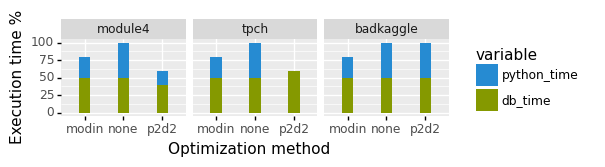

<ggplot: (129088495779)>

In [251]:
(
    ggplot(df, aes('Optimization method', y='Execution time %', fill='variable'))
    + geom_col(width=0.3)
    + scale_fill_manual(values=cdict) 
    + facet_wrap('workflow')
    + theme(figure_size=(5, 1))
)
